In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import warnings
warnings.simplefilter("ignore")

In [159]:
df = pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [137]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29020 non-null  object 
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  object 
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  object 
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date   

In [139]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [140]:
df.shape

(29020, 19)

In [141]:
df.duplicated().sum()

np.int64(0)

In [160]:
df.drop_duplicates(inplace=True)

In [161]:
df.shape

(29020, 19)

In [144]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [145]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    19551
Canceled         9469
Name: count, dtype: int64

In [162]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

### DATA ANALYSIS

In [163]:
data = df.copy()

In [164]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


#### UNIVARIATE ANALYSIS

In [149]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

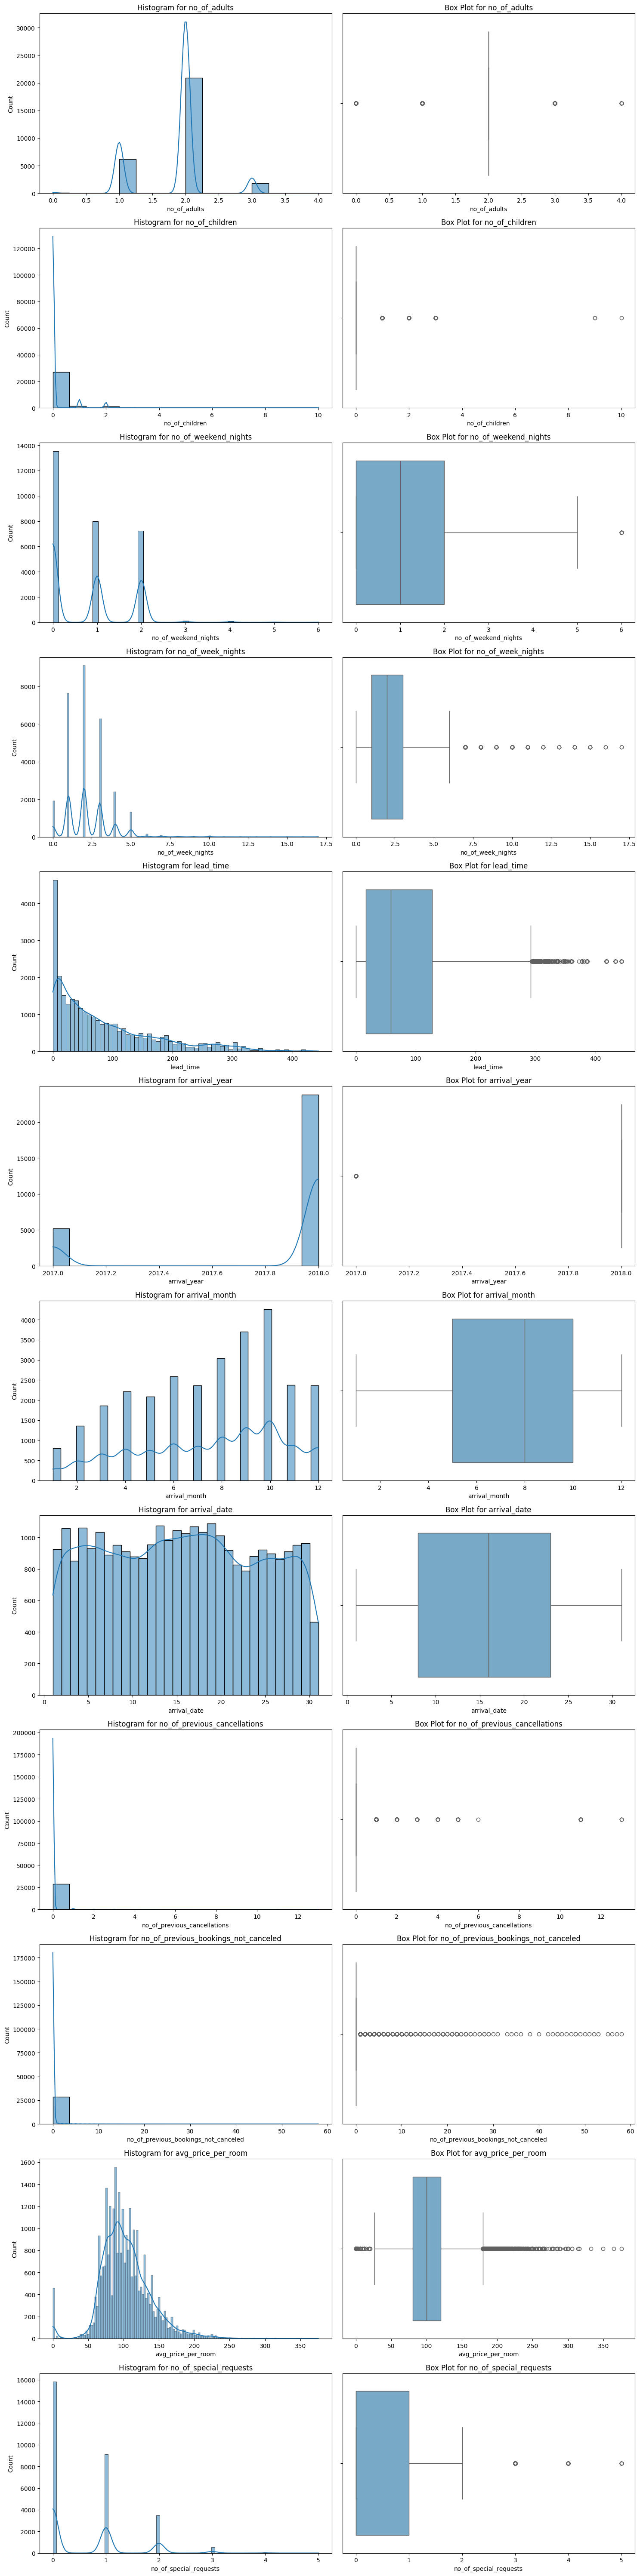

In [150]:
num_plot_dist(data , num_cols)

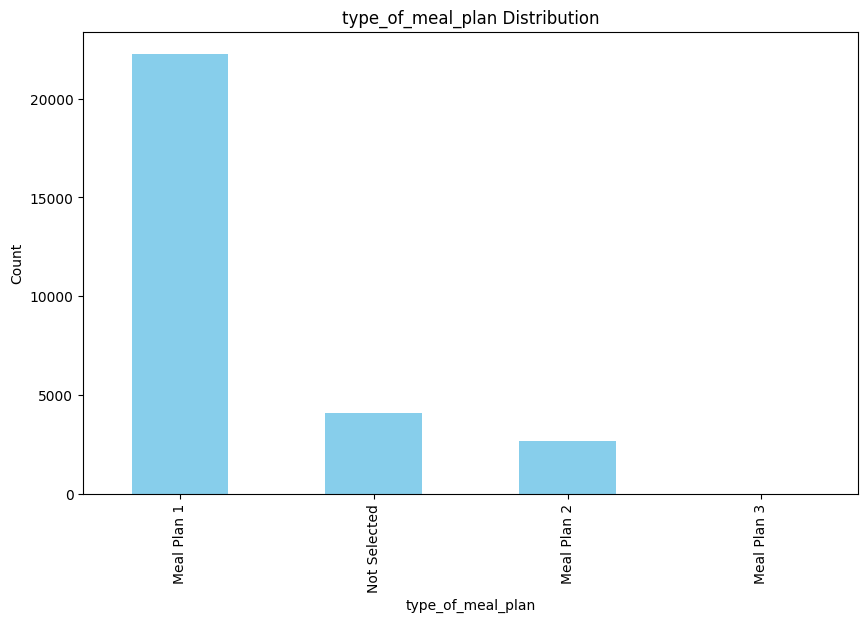

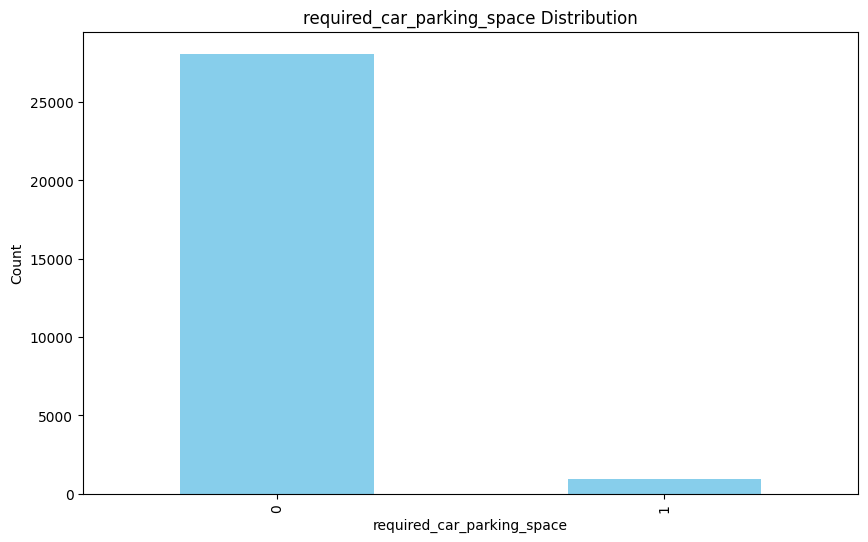

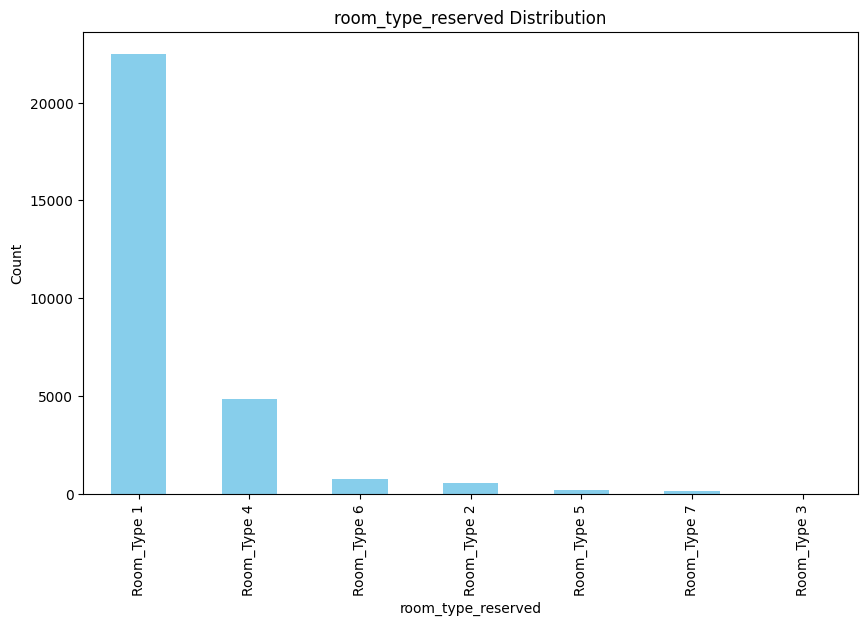

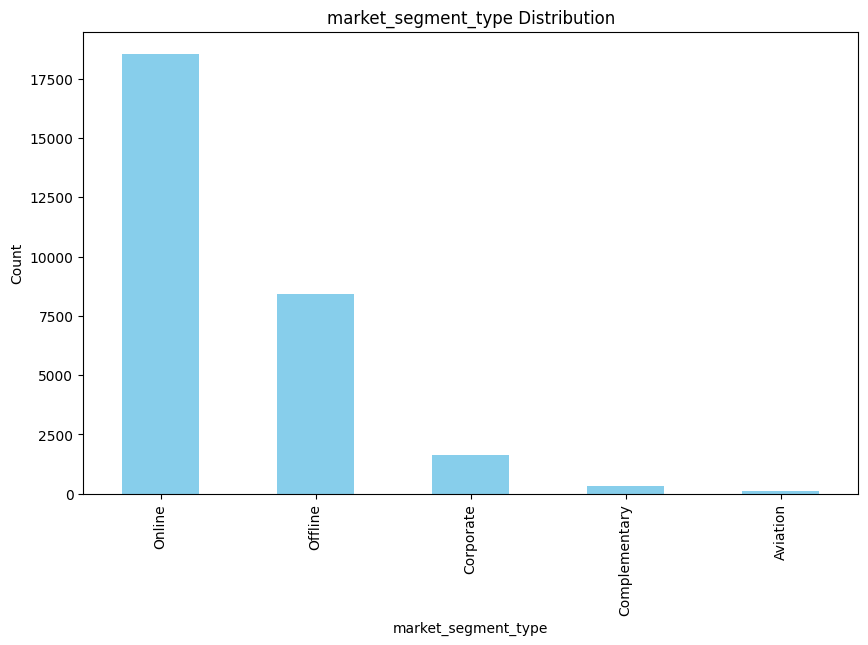

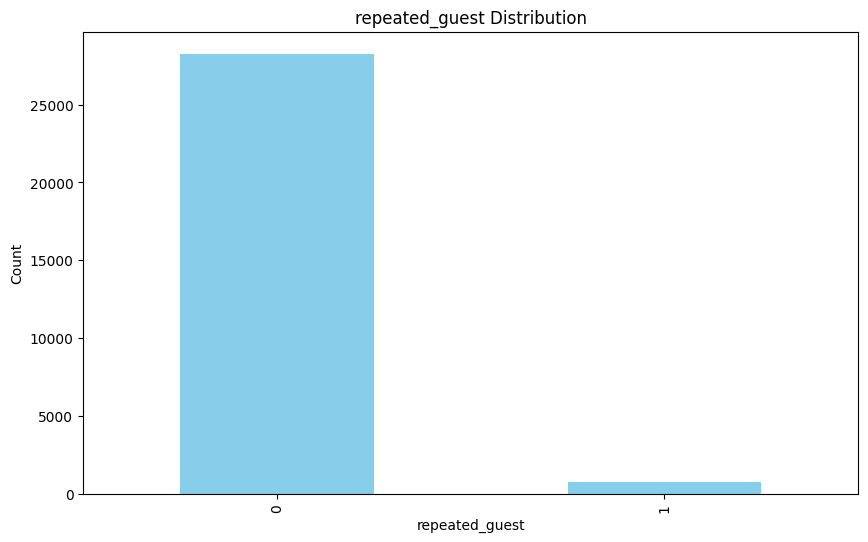

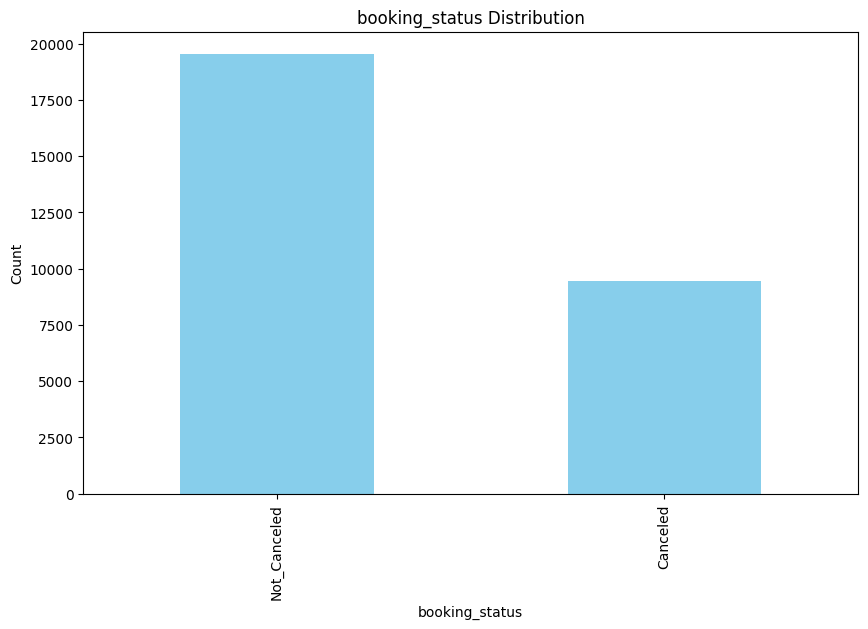

In [151]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### Bivaraite Analysis

In [152]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

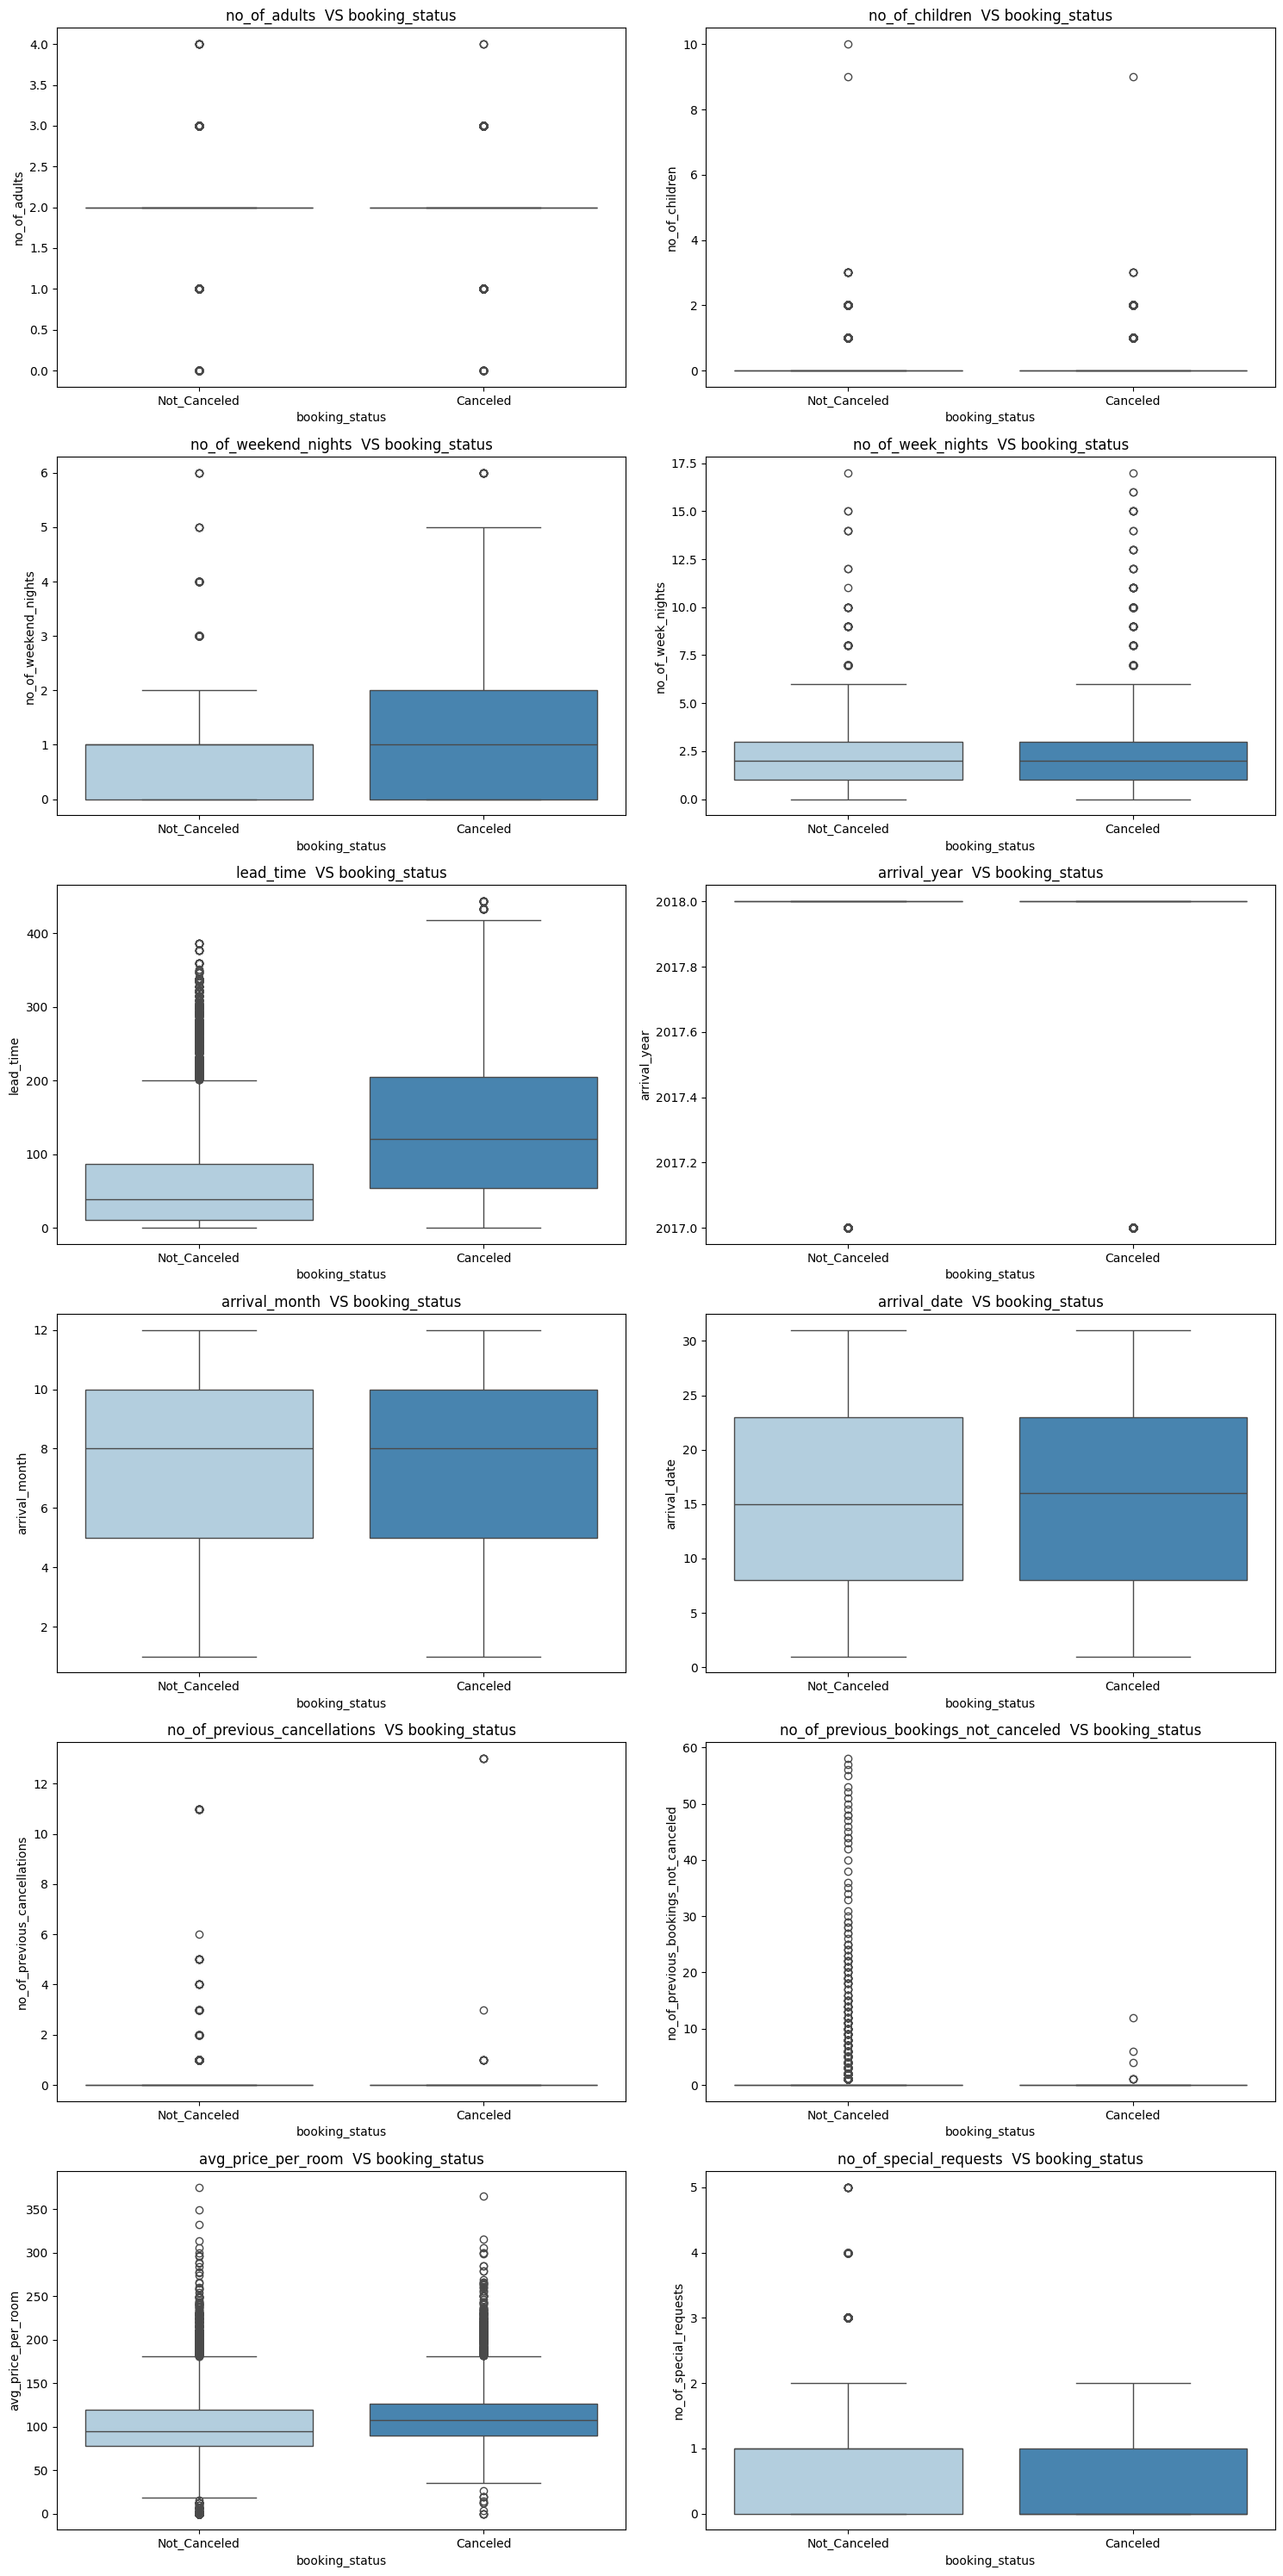

In [25]:
plot_bivariate_num(data , 'booking_status' , num_cols)

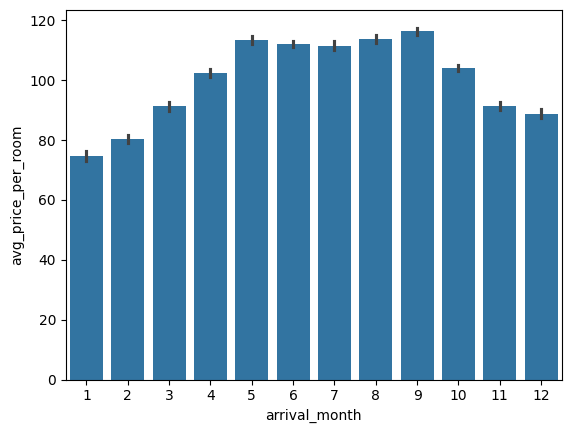

In [26]:
sns.barplot(x='arrival_month' , y="avg_price_per_room" , data=data)
plt.show()

In [27]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

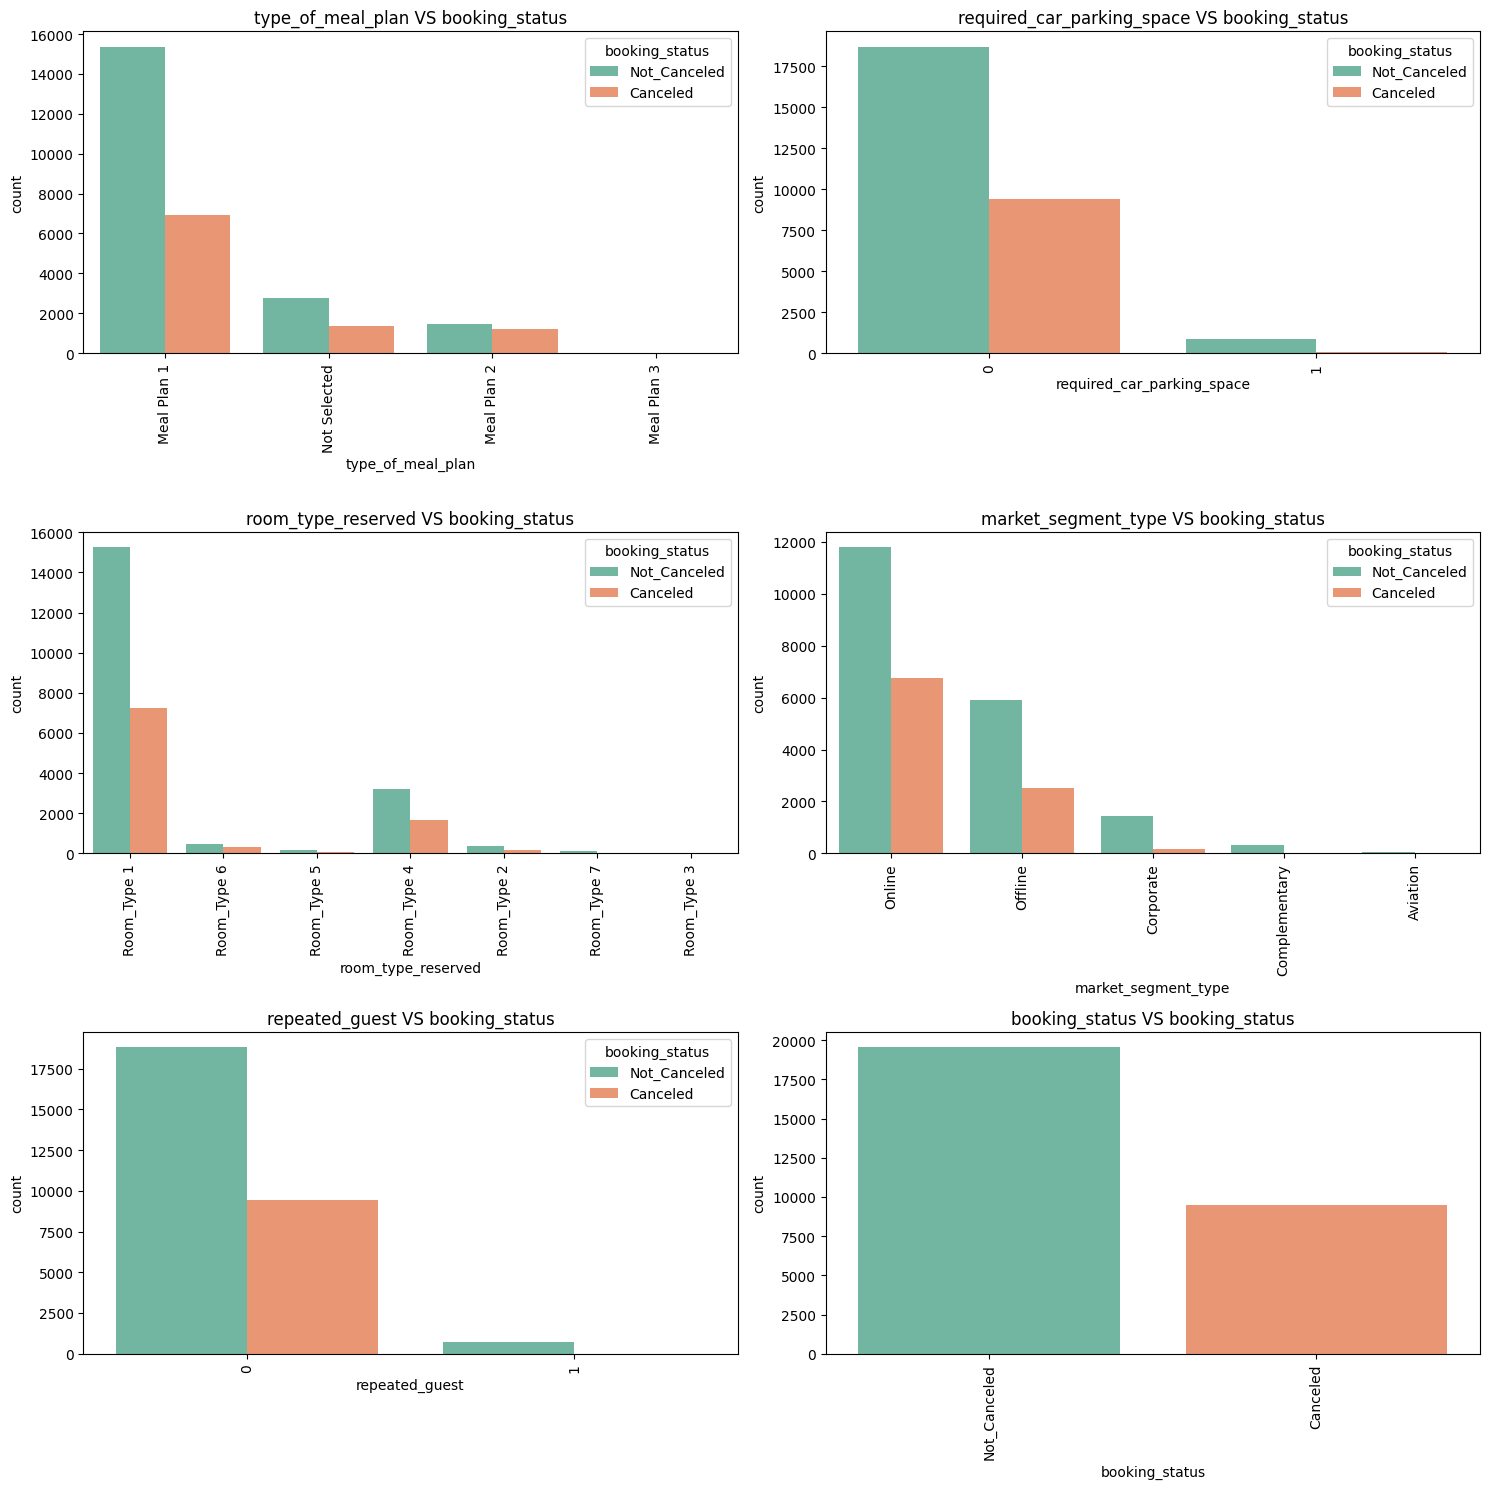

In [28]:
plot_bivaraite_cat(data , 'booking_status' , cat_cols)

#### DATA PROCESSING


In [30]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29020 non-null  object 
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  object 
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  object 
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date   

In [165]:
##### Label encoding
from sklearn.preprocessing import LabelEncoder

In [166]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}

In [167]:
# Drop ID column (not useful for modeling)
df.drop("Booking_ID", axis=1, inplace=True)


In [168]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [169]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29020 non-null  object 
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  int64  
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  int64  
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date   

### Multicollinearity

In [37]:
!pip install statsmodels

     ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.6 MB 2.2 MB/s eta 0:00:05
     - -------------------------------------- 0.4/9.6 MB 4.5 MB/s eta 0:00:03
     -- ------------------------------------- 0.5/9.6 MB 4.5 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/9.6 MB 4.2 MB/s eta 0:00:03
     --- ------------------------------------ 0.9/9.6 MB 4.4 MB/s eta 0:00:02
     ---- ----------------------------------- 1.0/9.6 MB 3.8 MB/s eta 0:00:03
     ---- ----------------------------------- 1.1/9.6 MB 3.4 MB/s eta 0:00:03
     ----- ---------------------------------- 1.2/9.6 MB 3.3 MB/s eta 0:00:03
     ------ --------------------------------- 1.6/9.6 MB 3.8 MB/s eta 0:00:03
     ------- -------------------------------- 1.8/9.6 MB 4.0 MB/s eta 0:00:02
     -------- ------------------------------- 2.1/9.6 MB 4.1 MB/s eta 0:00:02
     --------- ------------------------------ 2.3/9.6 MB 4.2 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [171]:
# Drop target column
X = df.drop("booking_status", axis=1)

# Compute VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print("\nVariance Inflation Factor (VIF) for features:")
print(vif.sort_values(by="VIF", ascending=False))


Variance Inflation Factor (VIF) for features:
                                 Feature        VIF
8                           arrival_year  53.549664
11                   market_segment_type  44.065778
0                           no_of_adults  17.647218
15                    avg_price_per_room  15.552167
9                          arrival_month   7.218714
10                          arrival_date   4.207265
3                      no_of_week_nights   3.762913
7                              lead_time   2.230558
2                   no_of_weekend_nights   1.976621
16                no_of_special_requests   1.926887
6                     room_type_reserved   1.916509
12                        repeated_guest   1.696070
14  no_of_previous_bookings_not_canceled   1.613166
4                      type_of_meal_plan   1.414685
13          no_of_previous_cancellations   1.358005
1                         no_of_children   1.342198
5             required_car_parking_space   1.067343


In [172]:
# Drop high-VIF features
df.drop(["arrival_year", "market_segment_type", "no_of_adults", "avg_price_per_room"], axis=1, inplace=True)

# Re-run VIF check
X = df.drop("booking_status", axis=1)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nAfter dropping high-VIF features:")
print(vif.sort_values(by="VIF", ascending=False))



After dropping high-VIF features:
                                 Feature       VIF
7                          arrival_month  4.555195
2                      no_of_week_nights  3.296951
8                           arrival_date  3.197933
6                              lead_time  2.129829
1                   no_of_weekend_nights  1.883631
12                no_of_special_requests  1.720070
11  no_of_previous_bookings_not_canceled  1.603038
5                     room_type_reserved  1.533116
9                         repeated_guest  1.530250
10          no_of_previous_cancellations  1.345706
3                      type_of_meal_plan  1.277199
0                         no_of_children  1.238177
4             required_car_parking_space  1.058349


In [173]:
vif_data

,feature,VIF
0,const,3.585767e+07
1,no_of_adults,1.295419e+00
2,no_of_children,1.257749e+00
3,no_of_weekend_nights,1.062324e+00
4,no_of_week_nights,1.086849e+00
5,type_of_meal_plan,1.155976e+00
6,required_car_parking_space,1.036866e+00
7,room_type_reserved,1.530014e+00
8,lead_time,1.440424e+00
9,arrival_year,1.297431e+00


In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# Features only (exclude target)
X = df.drop("booking_status", axis=1)

# Add constant
X_const = sm.add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif["feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

                                 feature        VIF
0                                  const  14.389692
1                         no_of_children   1.158725
2                   no_of_weekend_nights   1.039571
3                      no_of_week_nights   1.076486
4                      type_of_meal_plan   1.068469
5             required_car_parking_space   1.029673
6                     room_type_reserved   1.234421
7                              lead_time   1.101375
8                          arrival_month   1.041606
9                           arrival_date   1.005020
10                        repeated_guest   1.506965
11          no_of_previous_cancellations   1.341144
12  no_of_previous_bookings_not_canceled   1.591361
13                no_of_special_requests   1.069938


#### Our data dont have any multicollinearity


In [176]:
corr = df.select_dtypes(include=[np.number]).corr()
corr

,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
no_of_children,1.000000,0.029363,0.027730,-0.085639,0.031156,0.359788,-0.046830,-0.003387,0.028185,-0.036217,-0.016429,-0.021245,0.126538,-0.030347
no_of_weekend_nights,0.029363,1.000000,0.170348,-0.027533,-0.034955,0.058160,0.044089,-0.011612,0.029413,-0.066445,-0.020146,-0.027981,0.059582,-0.056956
no_of_week_nights,0.027730,0.170348,1.000000,-0.078791,-0.051730,0.095343,0.154032,0.037856,-0.007459,-0.097529,-0.029076,-0.044622,0.045760,-0.093921
type_of_meal_plan,-0.085639,-0.027533,-0.078791,1.000000,-0.015095,-0.208296,-0.064028,0.008640,0.005035,-0.066835,-0.016406,-0.038117,0.020935,-0.027236
required_car_parking_space,0.031156,-0.034955,-0.051730,-0.015095,1.000000,0.036740,-0.069882,-0.017233,-0.003162,0.117608,0.026509,0.071711,0.091292,0.090892
room_type_reserved,0.359788,0.058160,0.095343,-0.208296,0.036740,1.000000,-0.106759,-0.004403,0.028684,-0.027335,-0.008770,-0.012025,0.141985,-0.023396
lead_time,-0.046830,0.044089,0.154032,-0.064028,-0.069882,-0.106759,1.000000,0.134737,0.002029,-0.138162,-0.045136,-0.078447,-0.101831,-0.434425
arrival_month,-0.003387,-0.011612,0.037856,0.008640,-0.017233,-0.004403,0.134737,1.000000,-0.043967,0.005575,-0.037577,-0.005398,0.108712,0.012487
arrival_date,0.028185,0.029413,-0.007459,0.005035,-0.003162,0.028684,0.002029,-0.043967,1.000000,-0.017537,-0.010674,-0.000837,0.018331,-0.008020
repeated_guest,-0.036217,-0.066445,-0.097529,-0.066835,0.117608,-0.027335,-0.138162,0.005575,-0.017537,1.000000,0.390472,0.535062,-0.012914,0.107633


<Axes: >

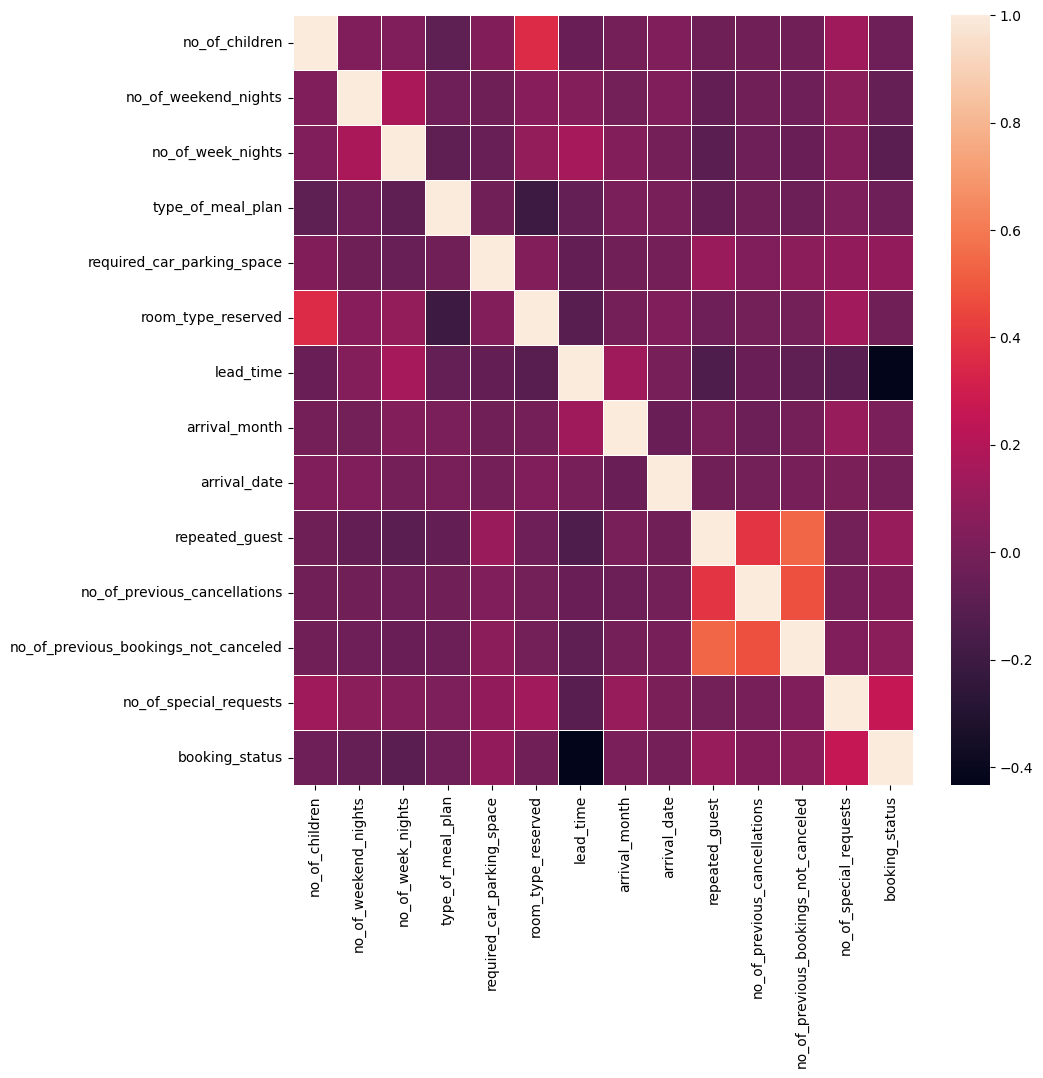

In [177]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , linewidths=0.5)

#### Skewness

In [178]:
# Calculate skewness only for numeric columns to avoid errors with string/object columns
skewness = df.select_dtypes(include=[np.number]).skew()
skewness

no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_month                           -0.346711
arrival_date                             0.027335
repeated_guest                           5.985562
no_of_previous_cancellations            24.940984
no_of_previous_bookings_not_canceled    19.509733
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

In [181]:
import numpy as np

# Calculate skewness again (only numeric columns)
skewness = df.select_dtypes(include=[np.number]).skew()

# Pick features with high skewness
high_skew_features = skewness[abs(skewness) > 2].index
print("Highly skewed features:", list(high_skew_features))

# Apply log1p transformation (log(1+x)) to reduce skewness
df[high_skew_features] = df[high_skew_features].apply(lambda x: np.log1p(x))

# Re-check skewness after transformation
new_skewness = df[high_skew_features].skew()
print("Skewness after log1p:\n", new_skewness)


Highly skewed features: ['no_of_children', 'required_car_parking_space', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']
Skewness after log1p:
 no_of_children                           3.595900
required_car_parking_space               5.323647
repeated_guest                           5.985562
no_of_previous_cancellations            14.550045
no_of_previous_bookings_not_canceled     8.897196
dtype: float64


In [182]:
from sklearn.preprocessing import PowerTransformer

# Features that are binary - keep as they are
binary_features = ['required_car_parking_space', 'repeated_guest']

# Features that are skewed counts - apply PowerTransformer (Yeo-Johnson works with zeros)
count_features = ['no_of_children', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']

# Apply transformation only on count features
pt = PowerTransformer(method='yeo-johnson')
df[count_features] = pt.fit_transform(df[count_features])

# Re-check skewness
new_skewness = df[count_features + binary_features].skew()
print("Skewness after Yeo-Johnson:\n", new_skewness)


Skewness after Yeo-Johnson:
 no_of_children                           3.221187
no_of_previous_cancellations            10.164671
no_of_previous_bookings_not_canceled     6.413330
required_car_parking_space               5.323647
repeated_guest                           5.985562
dtype: float64


In [184]:
for col in ['no_of_children', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']:
    upper_limit = df[col].quantile(0.95)  # cap at 95th percentile
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

skewness = df.select_dtypes(include=[np.number]).skew()
skewness

no_of_children                          3.221187
no_of_weekend_nights                    0.719426
no_of_week_nights                       1.542808
type_of_meal_plan                       1.806612
required_car_parking_space              5.323647
room_type_reserved                      1.729866
lead_time                               1.289144
arrival_month                          -0.346711
arrival_date                            0.027335
repeated_guest                          5.985562
no_of_previous_cancellations            0.000000
no_of_previous_bookings_not_canceled    0.000000
no_of_special_requests                  1.150448
booking_status                         -0.741025
dtype: float64

In [185]:
# Further fix for no_of_children (still highly skewed)
# Option: convert to binary (0 = no children, 1 = has children)
df['no_of_children'] = df['no_of_children'].apply(lambda x: 0 if x == 0 else 1)

# Recheck skewness after fix
df[['no_of_children']].skew()
df.head()

,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
0,1,2,1,0,0.0,0,26,10,17,0.0,-0.097451,-0.152316,0,1
1,1,1,1,0,0.0,0,98,7,16,0.0,-0.097451,-0.152316,2,1
2,1,0,3,0,0.0,0,433,9,8,0.0,-0.097451,-0.152316,0,0
3,1,2,5,0,0.0,0,195,8,8,0.0,-0.097451,-0.152316,0,1
4,1,0,2,0,0.0,0,188,6,15,0.0,-0.097451,-0.152316,0,0


In [189]:
# Handle no_of_children skewness
# Option 1: binarize
#df['no_of_children'] = df['no_of_children'].apply(lambda x: 0 if x == 0 else 1)

# Option 2 (alternative): cap at 3 children max
df['no_of_children'] = df['no_of_children'].clip(upper=3)

# Recheck skewness after fix
df[['no_of_children']].skew()
df.head()


,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
0,1,2,1,0,0.0,0,26,10,17,0.0,-0.097451,-0.152316,0,1
1,1,1,1,0,0.0,0,98,7,16,0.0,-0.097451,-0.152316,2,1
2,1,0,3,0,0.0,0,433,9,8,0.0,-0.097451,-0.152316,0,0
3,1,2,5,0,0.0,0,195,8,8,0.0,-0.097451,-0.152316,0,1
4,1,0,2,0,0.0,0,188,6,15,0.0,-0.097451,-0.152316,0,0


In [194]:
raw = pd.read_csv("train.csv")  # untouched data
raw.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [196]:
# Restore original no_of_children column from raw
df['no_of_children'] = raw['no_of_children']
df.head(20)

,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
0,1,2,1,0,0.000000,0,26,10,17,0.0,-0.097451,-0.152316,0,1
1,1,1,1,0,0.000000,0,98,7,16,0.0,-0.097451,-0.152316,2,1
2,0,0,3,0,0.000000,0,433,9,8,0.0,-0.097451,-0.152316,0,0
3,0,2,5,0,0.000000,0,195,8,8,0.0,-0.097451,-0.152316,0,1
4,0,0,2,0,0.000000,0,188,6,15,0.0,-0.097451,-0.152316,0,0
5,1,0,3,0,0.000000,0,74,4,6,0.0,-0.097451,-0.152316,1,0
6,0,1,2,0,0.000000,0,273,5,13,0.0,-0.097451,-0.152316,0,0
7,0,1,3,3,0.000000,0,6,12,15,0.0,-0.097451,-0.152316,0,1
8,0,2,5,0,0.000000,0,89,3,21,0.0,-0.097451,-0.152316,1,1
9,2,2,0,0,0.000000,5,56,3,20,0.0,-0.097451,-0.152316,1,0


#### Imablanced Data

In [197]:
df["booking_status"].value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [198]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [199]:
X.columns

Index(['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
       'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'lead_time', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests'],
      dtype='object')

In [56]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [200]:
y.value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [201]:
from imblearn.over_sampling import SMOTE

In [61]:
X_smote = X.drop(columns=['Booking_ID'])
X_res, y_res = smote.fit_resample(X_smote, y)

In [63]:
y_res

0        1
1        1
2        0
3        1
4        0
        ..
39097    0
39098    0
39099    0
39100    0
39101    0
Name: booking_status, Length: 39102, dtype: int64

In [64]:
y_res.value_counts()

booking_status
1    19551
0    19551
Name: count, dtype: int64

In [65]:
balanced_df = pd.DataFrame(X_res , columns=X.columns)
balanced_df["booking_status"] = y_res

In [66]:
balanced_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,NaN,2,0.693147,1.098612,0.693147,0,0,0,3.295837,7.609862,10,17,4,0,0.0,0.0,5.087596,0.000000,1
1,NaN,2,0.693147,0.693147,0.693147,0,0,0,4.595120,7.610358,7,16,4,0,0.0,0.0,4.808111,1.098612,1
2,NaN,2,0.000000,0.000000,1.386294,0,0,0,6.073045,7.610358,9,8,3,0,0.0,0.0,4.262680,0.000000,0
3,NaN,2,0.000000,1.098612,1.791759,0,0,0,5.278115,7.610358,8,8,3,0,0.0,0.0,4.293878,0.000000,1
4,NaN,1,0.000000,0.000000,1.098612,0,0,0,5.241747,7.610358,6,15,3,0,0.0,0.0,4.875197,0.000000,0


In [67]:
balanced_df.shape

(39102, 19)

In [68]:
df = balanced_df.copy()

In [69]:
df.shape

(39102, 19)

#### Feature Selection

In [70]:
len(df.columns)

19

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [73]:
model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [74]:
feature_importance = model.feature_importances_

In [75]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [76]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [77]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [78]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,3.295837,0.000000,5.087596,10,17,4,0.693147,1.098612,7.609862,2,1
1,4.595120,1.098612,4.808111,7,16,4,0.693147,0.693147,7.610358,2,1
2,6.073045,0.000000,4.262680,9,8,3,1.386294,0.000000,7.610358,2,0
3,5.278115,0.000000,4.293878,8,8,3,1.791759,1.098612,7.610358,2,1
4,5.241747,0.000000,4.875197,6,15,3,1.098612,0.000000,7.610358,1,0


In [79]:
len(top_10_df.columns)

11

In [80]:
df = top_10_df.copy()

### MODEL SELECTION


In [81]:
!pip install xgboost lightgbm

     ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/56.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/56.8 MB ? eta -:--:--
     --------------------------------------- 0.1/56.8 MB 871.5 kB/s eta 0:01:06
     --------------------------------------- 0.1/56.8 MB 939.4 kB/s eta 0:01:01
     --------------------------------------- 0.1/56.8 MB 711.9 kB/s eta 0:01:20
     --------------------------------------- 0.1/56.8 MB 711.9 kB/s eta 0:01:20
     --------------------------------------- 0.2/56.8 MB 583.1 kB/s eta 0:01:38
     --------------------------------------- 0.2/56.8 MB 583.1 kB/s eta 0:01:38
     --------------------------------------- 0.2/56.8 MB 518.8 kB/s eta 0:01:50
     --------------------------------------- 0.2/56.8 MB 529.7 kB/s eta 0:01:47
     --------------------------------------- 0.2/56.8 MB 502.2 kB/s eta 


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ----- --------------------------------- 8.1/56.8 MB 100.0 kB/s eta 0:08:08
     ----- ---------------------------------- 8.1/56.8 MB 98.7 kB/s eta 0:08:14
     ----- ---------------------------------- 8.1/56.8 MB 98.7 kB/s eta 0:08:14
     ----- ---------------------------------- 8.1/56.8 MB 98.7 kB/s eta 0:08:14
     ----- ---------------------------------- 8.1/56.8 MB 99.1 kB/s eta 0:08:12
     ----- ---------------------------------- 8.1/56.8 MB 99.1 kB/s eta 0:08:12
     ----- ---------------------------------- 8.1/56.8 MB 99.1 kB/s eta 0:08:12
     ----- ---------------------------------- 8.1/56.8 MB 99.1 kB/s eta 0:08:12
     ----- ---------------------------------- 8.1/56.8 MB 99.1 kB/s eta 0:08:12
     ----- ---------------------------------- 8.1/56.8 MB 98.3 kB/s eta 0:08:16
     ----- ---------------------------------- 8.2/56.8 MB 98.4 kB/s eta 0:08:15
     ----- ---------------------------------- 8.2/56.8 MB 98.4 kB/s eta 0:08:15
     ----- ----------------------------

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [83]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [202]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [85]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [86]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [87]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


[LightGBM] [Info] Number of positive: 15649, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 31281, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500272 -> initscore=0.001087
[LightGBM] [Info] Start training from score 0.001087


In [88]:
metrics_df= pd.DataFrame(metrics)

In [89]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.921621,0.919837,0.923373,0.921601
1,LogisticRegression,0.772280,0.792068,0.737058,0.763574
2,Gradient Boosting,0.864979,0.868653,0.859303,0.863953
3,Suuport vector classifier,0.785577,0.813116,0.740390,0.775050
4,Decsion Tree,0.885437,0.885978,0.884162,0.885069
5,KNN,0.849763,0.872643,0.818298,0.844597
6,Naive Bayes,0.705792,0.822912,0.522809,0.639398
7,XGboost,0.913055,0.910341,0.915941,0.913132
8,Adaboost,0.799898,0.808067,0.785495,0.796621
9,LGBM,0.904744,0.899721,0.910559,0.905108


##### TRAIN OUR RF MODEL

In [207]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [208]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [209]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [210]:
rf = RandomForestClassifier(random_state=42)

In [211]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

In [212]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [213]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.2s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....001A81B0230A0>, 'min_samples_leaf': <scipy.stats....001A81B022740>, 'min_samples_split': <scipy.stats....001A7CCD00C40>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [214]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [215]:
best_rf_model = random_search.best_estimator_

In [216]:
y_pred = best_rf_model.predict(X_test)

In [217]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [218]:
accuracy

0.8533769813921434

In [219]:
precision

0.8685491723466408

In [220]:
recall

0.9198246970868781

In [221]:
f1

0.8934518592713159

### Save this model

In [222]:
import joblib

In [223]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [224]:
loaded_model=joblib.load("random_forest.pkl")

In [225]:
X_train[0:3]

,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests
17252,0,0,4,0,0.0,3,61,6,1,0.0,-0.097451,-0.152316,1
11765,0,0,1,0,0.0,0,26,6,8,0.0,-0.097451,-0.152316,0
6826,0,1,5,0,0.0,0,281,12,26,0.0,-0.097451,-0.152316,2


In [231]:
new_data = np.array([10,1 ,	5.5,	9	,8,	4,	5,	2,	0, 8, 9 ,1 ,0]).reshape(1,-1), 

In [232]:
predictions=loaded_model.predict(new_data)

ValueError: Found array with dim 3, while dim <= 2 is required by RandomForestClassifier.

In [228]:
predictions

array([0])

In [135]:
print("Predicted class:", predictions[0])

Predicted class: 0


In [236]:
# ==========================
# 1. Imports
# ==========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# ==========================
# 2. Load Dataset
# ==========================
df = pd.read_csv("Train.csv")



In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29020 non-null  object 
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  object 
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  object 
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date   

In [238]:
df.head(20)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled
5,INN07412,2,1,0,3,Meal Plan 1,0,Room_Type 1,74,2018,4,6,Online,0,0,0,112.50,1,Canceled
6,INN22966,2,0,1,2,Meal Plan 1,0,Room_Type 1,273,2018,5,13,Offline,0,0,0,95.00,0,Canceled
7,INN25678,2,0,1,3,Not Selected,0,Room_Type 1,6,2018,12,15,Online,0,0,0,66.30,0,Not_Canceled
8,INN33712,2,0,2,5,Meal Plan 1,0,Room_Type 1,89,2018,3,21,Online,0,0,0,83.66,1,Not_Canceled
9,INN20728,2,2,2,0,Meal Plan 1,0,Room_Type 6,56,2018,3,20,Online,0,0,0,180.00,1,Canceled


In [239]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000
mean,1.844280,0.106306,0.807822,2.202068,0.031943,85.376085,2017.820434,7.416506,15.598725,0.025775,0.023880,0.154721,103.501785,0.619917
std,0.518692,0.405391,0.868111,1.402801,0.175853,85.859070,0.383832,3.060058,8.740151,0.158467,0.375994,1.777787,35.137794,0.786348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.500000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,58.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.850000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.120000,1.000000
max,4.000000,10.000000,6.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,375.500000,5.000000


In [240]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# ================= Load Data =================
df = pd.read_csv("train.csv")

# Drop Booking_ID
if "Booking_ID" in df.columns:
    df = df.drop("Booking_ID", axis=1)

# Encode target
df['booking_status'] = df['booking_status'].map({"Not_Canceled": 0, "Canceled": 1})

# Save category mappings for decoding later
category_mappings = {}
categorical_cols = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]

for col in categorical_cols:
    df[col] = df[col].astype("category")
    category_mappings[col] = dict(enumerate(df[col].cat.categories))
    df[col] = df[col].cat.codes

# ================= Split Data =================
X = df.drop("booking_status", axis=1)
y = df["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================= Train Model =================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# ================= Save Model =================
joblib.dump((rf, X_train.columns, category_mappings), "random_forest.pkl")
print("Model saved as random_forest.pkl")

# ================= Load Model =================
loaded_model, model_columns, category_mappings = joblib.load("random_forest.pkl")

# ================= Test with Sample Row =================
# Take first row from X_test
sample_df = X_test.iloc[[0]]

print("\nEncoded sample input (used by model):")
print(sample_df)

# Decode categorical columns for readability
decoded_sample = sample_df.copy()
for col in categorical_cols:
    decoded_sample[col] = decoded_sample[col].map(category_mappings[col])

print("\nDecoded sample input (original values):")
print(decoded_sample)

# Prediction
pred = loaded_model.predict(sample_df)
print("\nPrediction:", "Not_Canceled" if pred[0] == 0 else "Canceled")


Accuracy: 0.895933838731909
Model saved as random_forest.pkl

Encoded sample input (used by model):
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
24719             1               0                     0                  3   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
24719                  0                           0                   0   

       lead_time  arrival_year  arrival_month  arrival_date  \
24719         58          2018              1            27   

       market_segment_type  repeated_guest  no_of_previous_cancellations  \
24719                    3               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
24719                                     0                81.0   

       no_of_special_requests  
24719                       0  

Decoded sample input (original values):
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_w

In [241]:
import joblib

rf_model, model_columns, category_mappings = joblib.load("random_forest.pkl")
print("Model loaded successfully ✅")
print("Columns:", model_columns)
print("Category mappings:", category_mappings)


Model loaded successfully ✅
Columns: Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')
Category mappings: {'type_of_meal_plan': {0: 'Meal Plan 1', 1: 'Meal Plan 2', 2: 'Meal Plan 3', 3: 'Not Selected'}, 'room_type_reserved': {0: 'Room_Type 1', 1: 'Room_Type 2', 2: 'Room_Type 3', 3: 'Room_Type 4', 4: 'Room_Type 5', 5: 'Room_Type 6', 6: 'Room_Type 7'}, 'market_segment_type': {0: 'Aviation', 1: 'Complementary', 2: 'Corporate', 3: 'Offline', 4: 'Online'}}


In [249]:
import joblib
import numpy as np

# Load model + metadata
rf_model, model_columns, category_mappings = joblib.load("random_forest.pkl")

def predict_reservation(
    no_of_adults,
    no_of_children,
    no_of_weekend_nights,
    no_of_week_nights,
    type_of_meal_plan,
    required_car_parking_space,
    room_type_reserved,
    lead_time,
    arrival_year,
    arrival_month,
    arrival_date,
    market_segment_type,
    repeated_guest,
    no_of_previous_cancellations,
    no_of_previous_bookings_not_canceled,
    avg_price_per_room,
    no_of_special_requests
):
    """
    Takes raw input values (with categorical as strings) and predicts reservation status.
    """
    # Reverse mappings: str -> numeric
    reverse_mappings = {col: {v: k for k, v in mapping.items()} 
                        for col, mapping in category_mappings.items()}

    # Convert categorical inputs
    type_of_meal_plan = reverse_mappings['type_of_meal_plan'][type_of_meal_plan]
    room_type_reserved = reverse_mappings['room_type_reserved'][room_type_reserved]
    market_segment_type = reverse_mappings['market_segment_type'][market_segment_type]

    # Arrange features in correct order
    features = np.array([[
        no_of_adults,
        no_of_children,
        no_of_weekend_nights,
        no_of_week_nights,
        type_of_meal_plan,
        required_car_parking_space,
        room_type_reserved,
        lead_time,
        arrival_year,
        arrival_month,
        arrival_date,
        market_segment_type,
        repeated_guest,
        no_of_previous_cancellations,
        no_of_previous_bookings_not_canceled,
        avg_price_per_room,
        no_of_special_requests
    ]])

    # Prediction
    prediction = rf_model.predict(features)[0]
    return prediction


# 🔹 Example test
result = predict_reservation(
    no_of_adults=2,
    no_of_children=1,
    no_of_weekend_nights=2,
    no_of_week_nights=3,
    type_of_meal_plan="Meal Plan 1",
    required_car_parking_space=1,
    room_type_reserved="Room_Type 1",
    lead_time=120,
    arrival_year=2018,
    arrival_month=6,
    arrival_date=15,
    market_segment_type="Online",
    repeated_guest=0,
    no_of_previous_cancellations=0,
    no_of_previous_bookings_not_canceled=1,
    avg_price_per_room=110.5,
    no_of_special_requests=2
)

print("🔮 Prediction:", result)


🔮 Prediction: 0


In [250]:
result = predict_reservation(
    no_of_adults=2,
    no_of_children=0,
    no_of_weekend_nights=0,
    no_of_week_nights=5,
    type_of_meal_plan="Not Selected",
    required_car_parking_space=0,
    room_type_reserved="Room_Type 4",
    lead_time=365,  # very high lead time
    arrival_year=2018,
    arrival_month=12,
    arrival_date=30,
    market_segment_type="Offline",  # higher cancel chance
    repeated_guest=0,
    no_of_previous_cancellations=2,
    no_of_previous_bookings_not_canceled=0,
    avg_price_per_room=200.0,  # high price
    no_of_special_requests=0   # not serious
)

status_mapping = {0: "Not Canceled", 1: "Canceled"}
print("🔮 Prediction:", status_mapping[result])


🔮 Prediction: Not Canceled


In [252]:
result = predict_reservation(
    no_of_adults=1,
    no_of_children=0,
    no_of_weekend_nights=0,
    no_of_week_nights=1,
    type_of_meal_plan="Not Selected",
    required_car_parking_space=0,
    room_type_reserved="Room_Type 7",
    lead_time=700,  # max lead time possible
    arrival_year=2018,
    arrival_month=1,
    arrival_date=1,
    market_segment_type="Complementary",  # usually weak commitment
    repeated_guest=0,
    no_of_previous_cancellations=5,  # frequent canceller
    no_of_previous_bookings_not_canceled=0,
    avg_price_per_room=500.0,  # very expensive
    no_of_special_requests=0   # no commitment
)

status_mapping = {0: "Not Canceled", 1: "Canceled"}
print("🔮 Prediction:", status_mapping[result])


🔮 Prediction: Canceled


In [256]:
import numpy as np
import pandas as pd
import joblib

def encode_value(column, value):
    """Convert category string to encoded integer using saved mapping"""
    if column in category_mappings:
        reverse_map = {v: k for k, v in category_mappings[column].items()}
        return reverse_map[value]
    return value

def predict_with_proba(**kwargs):
    # Convert categorical strings into their encoded values
    for col in category_mappings.keys():
        if col in kwargs:
            kwargs[col] = encode_value(col, kwargs[col])


In [257]:
result = predict_with_proba(
    no_of_adults=2,
    no_of_children=1,
    no_of_weekend_nights=2,
    no_of_week_nights=3,
    type_of_meal_plan="Meal Plan 1",   # works now ✅
    required_car_parking_space=1,
    room_type_reserved="Room_Type 1",
    lead_time=120,
    arrival_year=2018,
    arrival_month=6,
    arrival_date=15,
    market_segment_type="Online",      # works now ✅
    repeated_guest=0,
    no_of_previous_cancellations=0,
    no_of_previous_bookings_not_canceled=1,
    avg_price_per_room=110.5,
    no_of_special_requests=2
)

print(result)


None


In [258]:
predict_with_proba(
    no_of_adults=2,
    no_of_children=1,
    no_of_weekend_nights=2,
    no_of_week_nights=3,
    type_of_meal_plan="Meal Plan 1",   # string ✅
    required_car_parking_space=1,
    room_type_reserved="Room_Type 1",  # string ✅
    lead_time=120,
    arrival_year=2018,
    arrival_month=6,
    arrival_date=15,
    market_segment_type="Online",      # string ✅
    repeated_guest=0,
    no_of_previous_cancellations=0,
    no_of_previous_bookings_not_canceled=1,
    avg_price_per_room=110.5,
    no_of_special_requests=2
)
print(result)

None


In [260]:
import numpy as np

def predict_with_proba(**kwargs):
    # Convert categorical values to numeric using category_mappings
    for col, mapping in category_mappings.items():
        if col in kwargs and isinstance(kwargs[col], str):
            # Find the numeric code for the given string
            reverse_map = {v: k for k, v in mapping.items()}
            if kwargs[col] in reverse_map:
                kwargs[col] = reverse_map[kwargs[col]]
            else:
                raise ValueError(f"Invalid category '{kwargs[col]}' for column '{col}'")

    # Build input data
    data = {k: [v] for k, v in kwargs.items()}
    X = pd.DataFrame(data, columns=model_columns)

    # Predict
    proba = rf_model.predict_proba(X)[0]
    prediction = rf_model.predict(X)[0]

    print(f"🔮 Prediction: {'Canceled' if prediction == 1 else 'Not Canceled'}")
    print(f"📊 Probabilities → Not Canceled: {proba[0]:.2f}, Canceled: {proba[1]:.2f}")
    return prediction, proba


In [263]:
predict_with_proba(
    no_of_adults=2,
    no_of_children=1,
    no_of_weekend_nights=2,
    no_of_week_nights=3,
    type_of_meal_plan="Meal Plan 1",   # string ✅
    required_car_parking_space=1,
    room_type_reserved="Room_Type 1",  # string ✅
    lead_time=120,
    arrival_year=2018,
    arrival_month=6,
    arrival_date=15,
    market_segment_type="Online",      # string ✅
    repeated_guest=0,
    no_of_previous_cancellations=0,
    no_of_previous_bookings_not_canceled=1,
    avg_price_per_room=110.5,
    no_of_special_requests=2
)
print(result)

🔮 Prediction: Not Canceled
📊 Probabilities → Not Canceled: 0.95, Canceled: 0.05
None


In [264]:
predict_with_proba(
    no_of_adults=2,
    no_of_children=0,
    no_of_weekend_nights=0,
    no_of_week_nights=2,
    type_of_meal_plan="Meal Plan 2",
    required_car_parking_space=0,
    room_type_reserved="Room_Type 4",
    lead_time=365,   # very high lead time
    arrival_year=2018,
    arrival_month=12,
    arrival_date=25,
    market_segment_type="Online",
    repeated_guest=0,
    no_of_previous_cancellations=2,
    no_of_previous_bookings_not_canceled=0,
    avg_price_per_room=300.0,  # expensive
    no_of_special_requests=0
)
print(result)

🔮 Prediction: Not Canceled
📊 Probabilities → Not Canceled: 0.56, Canceled: 0.44
None


In [265]:
predict_with_proba(
    no_of_adults=1,
    no_of_children=0,
    no_of_weekend_nights=0,
    no_of_week_nights=1,
    type_of_meal_plan="Not Selected",
    required_car_parking_space=0,
    room_type_reserved="Room_Type 7",
    lead_time=500,   # extreme lead time
    arrival_year=2018,
    arrival_month=11,
    arrival_date=30,
    market_segment_type="Corporate",
    repeated_guest=0,
    no_of_previous_cancellations=5,  # big history of cancellations
    no_of_previous_bookings_not_canceled=0,
    avg_price_per_room=500.0,  # very high price
    no_of_special_requests=0
)


🔮 Prediction: Canceled
📊 Probabilities → Not Canceled: 0.25, Canceled: 0.75


(np.int64(1), array([0.25, 0.75]))